In [7]:
# Python
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('./examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [6]:
df.index = pd.to_datetime(df['ds'])

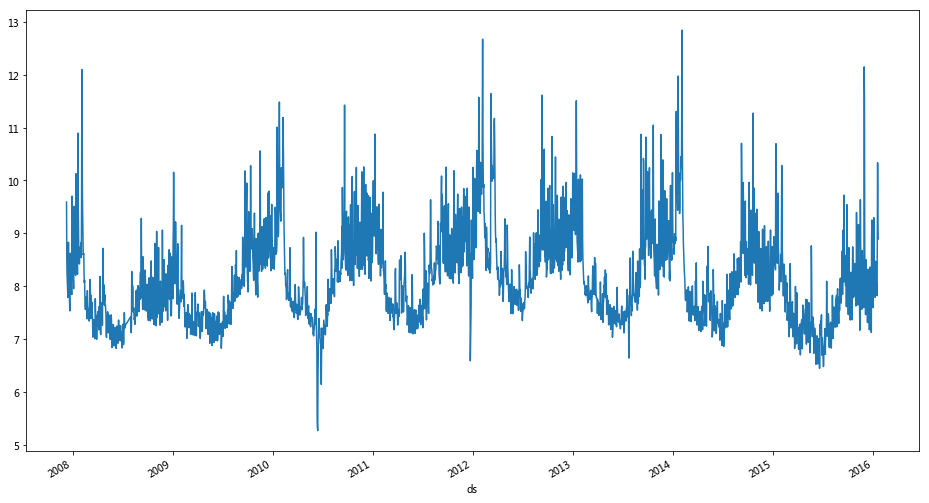

In [8]:
df['y'].plot(figsize=(16, 9))

In [9]:
# Python
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\pystan\misc.py:362: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(np.asarray(v).dtype, int):
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\pystan\misc.py:364: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [11]:
forecast = m.predict(future)

In [12]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-12-10,8.037608,8.037608,8.037608,8.204761,9.508529,0.802993,0.802993,0.802993,0.0,0.0,0.0,0.352288,0.352288,0.352288,0.450705,0.450705,0.450705,8.840602
1,2007-12-11,8.036072,8.036072,8.036072,7.978430,9.180617,0.553082,0.553082,0.553082,0.0,0.0,0.0,0.119626,0.119626,0.119626,0.433455,0.433455,0.433455,8.589154
2,2007-12-12,8.034535,8.034535,8.034535,7.808973,8.998514,0.350485,0.350485,0.350485,0.0,0.0,0.0,-0.066655,-0.066655,-0.066655,0.417140,0.417140,0.417140,8.385020
3,2007-12-13,8.032999,8.032999,8.032999,7.683363,8.952481,0.329929,0.329929,0.329929,0.0,0.0,0.0,-0.072275,-0.072275,-0.072275,0.402204,0.402204,0.402204,8.362928
4,2007-12-14,8.031462,8.031462,8.031462,7.760183,8.965468,0.319483,0.319483,0.319483,0.0,0.0,0.0,-0.069569,-0.069569,-0.069569,0.389053,0.389053,0.389053,8.350945


In [21]:
forecast.index = pd.to_datetime(forecast['ds'])

In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
ds,,,,
2017-01-15,2017-01-15,8.208867,7.519995,8.954223
2017-01-16,2017-01-16,8.533876,7.823439,9.263032
2017-01-17,2017-01-17,8.321287,7.585157,9.056391
2017-01-18,2017-01-18,8.153931,7.445023,8.855728
2017-01-19,2017-01-19,8.165845,7.386175,8.862490


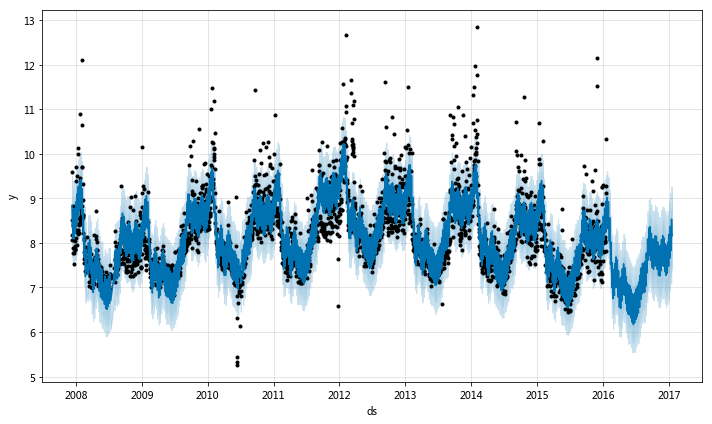

In [30]:
fig1 = m.plot(forecast)

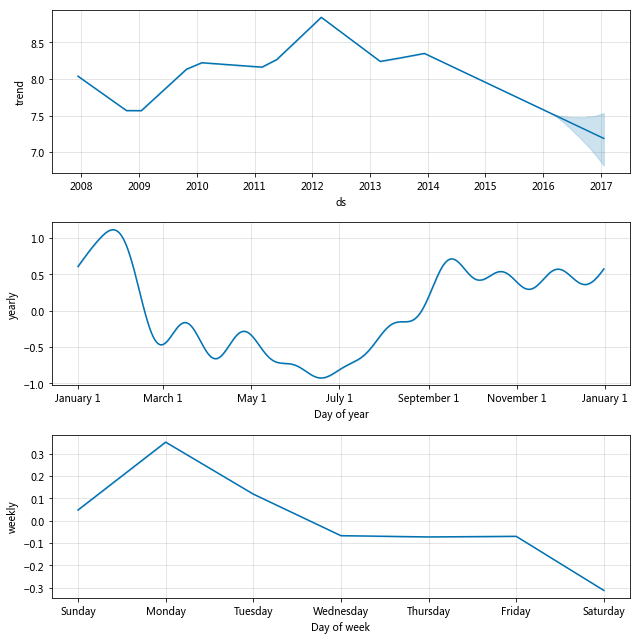

In [31]:
fig2 = m.plot_components(forecast)